In [1]:
import pandas as pd

In [2]:
test_df = pd.read_csv('test_FD001.txt', sep=" ", header=None)
test_df.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21', 'blank', 'blank2']
test_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s14,s15,s16,s17,s18,s19,s20,s21,blank,blank2
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN


In [3]:
import RUL_Model

In [4]:
predictions = RUL_Model.preprocess_and_predict(test_df)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [5]:
test_df.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21']
test_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.65625,0.692308,NaN,NaN,0.596215,0.421968,0.282214,NaN,...,0.534247,0.325581,0.152259,0.347076,NaN,0.375,NaN,NaN,0.500000,0.620099
1,1,2,0.34375,0.230769,NaN,NaN,0.182965,0.504025,0.225240,NaN,...,0.634703,0.395349,0.277907,0.227709,NaN,0.500,NaN,NaN,0.645455,0.645718
2,1,3,0.53125,0.538462,NaN,NaN,0.419558,0.464814,0.346130,NaN,...,0.591324,0.325581,0.192892,0.533557,NaN,0.500,NaN,NaN,0.700000,0.681104
3,1,4,0.77500,0.461538,NaN,NaN,0.413249,0.391587,0.449867,NaN,...,0.456621,0.372093,0.217896,0.282359,NaN,0.250,NaN,NaN,0.627273,0.620382
4,1,5,0.60000,0.461538,NaN,NaN,0.435331,0.471306,0.357974,NaN,...,0.632420,0.325581,0.187891,0.337009,NaN,0.125,NaN,NaN,0.618182,0.676008


## Investigating the Generated Predictions

In [6]:
len(predictions)

8162

In [7]:
len(test_df)

13096

In [8]:
num_preds = pd.DataFrame(test_df.groupby('id')['cycle'].max()-50).reset_index()
num_preds['NumPreds'] = num_preds['cycle'].map(lambda x: x if x >= 0 else 0)
num_preds.head()

,id,cycle,NumPreds
0,1,-19,0
1,2,-1,0
2,3,76,76
3,4,56,56
4,5,48,48


In [9]:
num_preds['NumPreds'].sum()

8162

## Notes:
* One prediction for every 50-cycle window per unit
* Units with less than 50 cycles don't have predictions generated

## Testing generated Predictions for a single unit

### Note: Units with <50 cycles will hit an error

In [10]:
unit = test_df[test_df.id==10]
print(len(unit))
unit.head()

192


,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
896,10,1,0.40625,0.461538,NaN,NaN,0.296530,0.393404,0.394119,NaN,...,0.627854,0.279070,0.330059,0.340844,NaN,0.250,NaN,NaN,0.400000,0.591083
897,10,2,0.89375,0.384615,NaN,NaN,0.375394,0.400935,0.081274,NaN,...,0.732877,0.325581,0.338275,0.313039,NaN,0.375,NaN,NaN,0.700000,0.786129
898,10,3,0.68125,0.230769,NaN,NaN,0.201893,0.134511,0.320196,NaN,...,0.648402,0.255814,0.292195,0.208533,NaN,0.250,NaN,NaN,0.909091,0.697948
899,10,4,0.33750,0.153846,NaN,NaN,0.536278,0.385874,0.404533,NaN,...,0.582192,0.186047,0.325594,0.441994,NaN,0.375,NaN,NaN,0.663636,0.604105
900,10,5,0.59375,0.307692,NaN,NaN,0.287066,0.420151,0.390239,NaN,...,0.662100,0.255814,0.300232,0.383030,NaN,0.250,NaN,NaN,0.572727,0.665959


In [11]:
test_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.65625,0.692308,NaN,NaN,0.596215,0.421968,0.282214,NaN,...,0.534247,0.325581,0.152259,0.347076,NaN,0.375,NaN,NaN,0.500000,0.620099
1,1,2,0.34375,0.230769,NaN,NaN,0.182965,0.504025,0.225240,NaN,...,0.634703,0.395349,0.277907,0.227709,NaN,0.500,NaN,NaN,0.645455,0.645718
2,1,3,0.53125,0.538462,NaN,NaN,0.419558,0.464814,0.346130,NaN,...,0.591324,0.325581,0.192892,0.533557,NaN,0.500,NaN,NaN,0.700000,0.681104
3,1,4,0.77500,0.461538,NaN,NaN,0.413249,0.391587,0.449867,NaN,...,0.456621,0.372093,0.217896,0.282359,NaN,0.250,NaN,NaN,0.627273,0.620382
4,1,5,0.60000,0.461538,NaN,NaN,0.435331,0.471306,0.357974,NaN,...,0.632420,0.325581,0.187891,0.337009,NaN,0.125,NaN,NaN,0.618182,0.676008


In [12]:
RUL_Model.preprocess_and_predict(unit)

IndexError: index 26 is out of bounds for axis 0 with size 26

In [ ]:
len([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 6, 6, 4, 3,
       3, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6])

## Update: Backfill units with less than 50 cycles

In [19]:
test_df = pd.read_csv('test_FD001.txt', sep=" ", header=None)
test_df.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21', 'blank', 'blank2']

In [21]:
groupby = test_df.groupby('id')['cycle'].max()
nrows = groupby[groupby<=50]
print(len(nrows))
nrows

8


id
1     31
2     49
14    46
22    39
25    48
33    50
39    37
85    34
Name: cycle, dtype: int64

In [22]:
test_df.id.nunique()

100

In [23]:
over_50 = test_df[~test_df.id.isin(nrows.index)]
over_50.id.nunique()

92

In [24]:
nrows.index

Int64Index([1, 2, 14, 22, 25, 33, 39, 85], dtype='int64', name='id')

In [25]:
for unit in nrows.index:
    print(unit)
    temp = test_df[test_df.id == unit]
    padding = pd.DataFrame()
    nmissing = 51 - len(temp)
    #Create synthetic starter rows
    for i in range(nmissing):
        padding = padding.append(pd.DataFrame(temp.iloc[0]).transpose(), ignore_index=True)
    #Combine synthetic starter padding with available data
    temp = padding.append(temp, ignore_index=True)
    #Renumber cycles
    temp.cycle = range(1,len(temp)+1)
    #Append new padded series to over 50, 
    over_50 = over_50.append(temp, ignore_index=True)
print(len(over_50), over_50.id.nunique())
over_50.tail()

1
2
14
22
25
33
39
85
13170 100


,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s14,s15,s16,s17,s18,s19,s20,s21,blank,blank2
13165,85.0,47,0.0003,-0.0002,100.0,518.67,642.35,1589.63,1410.54,14.62,...,8132.30,8.4355,0.03,393.0,2388.0,100.0,38.71,23.3132,NaN,NaN
13166,85.0,48,0.0001,0.0002,100.0,518.67,643.04,1587.07,1398.22,14.62,...,8129.64,8.4174,0.03,394.0,2388.0,100.0,38.90,23.1619,NaN,NaN
13167,85.0,49,0.0014,-0.0004,100.0,518.67,642.99,1597.09,1401.76,14.62,...,8130.73,8.4172,0.03,391.0,2388.0,100.0,38.90,23.2145,NaN,NaN
13168,85.0,50,0.0000,-0.0005,100.0,518.67,642.75,1588.33,1405.64,14.62,...,8129.68,8.4336,0.03,393.0,2388.0,100.0,38.93,23.1918,NaN,NaN
13169,85.0,51,0.0014,-0.0005,100.0,518.67,642.58,1582.94,1413.22,14.62,...,8126.60,8.4228,0.03,393.0,2388.0,100.0,38.84,23.3107,NaN,NaN


### Generate Predictions

In [26]:
predictions_full = RUL_Model.preprocess_and_predict(over_50)

### Verify that there are now predictions for each unit

In [27]:
len(predictions)

8162

In [28]:
len(predictions_full)

8170

In [29]:
sum(over_50.groupby('id')['cycle'].max()-50)

8170

## Converting Category Labels into RUL predictions

In [31]:
w = [200,175,150,125,100,75,50,40,30,25,20,15,10,5]
len(w)

14

In [32]:
import numpy as np

In [33]:
rul_cats = [210]
for i in range(len(w)-1):
    upper , lower = w[i], w[i+1]
    rul_cats.append(round(np.mean([upper,lower])))
rul_cats.append(3)
rul_dict = dict(zip(range(len(w)+1), rul_cats))

In [34]:
over_50_pred = over_50[(over_50.cycle>50)]
print(len(over_50_pred), len(predictions_full))

8170 8170


In [35]:
over_50_pred['prediction'] = predictions_full

<ipython-input-35-160c0aac2655>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  over_50_pred['prediction'] = predictions_full


In [63]:
over_50_pred = over_50_pred.sort_values(by=['id', 'cycle'])
over_50_pred.tail()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,prediction
12757,100.0,194,0.81875,0.461538,NaN,NaN,0.665615,0.789665,0.641209,NaN,...,0.255814,0.935703,0.664909,NaN,0.625,NaN,NaN,0.309091,0.370842,14
12758,100.0,195,0.44375,0.384615,NaN,NaN,0.659306,0.692028,0.769042,NaN,...,0.465116,0.914003,0.567593,NaN,0.750,NaN,NaN,0.236364,0.483652,14
12759,100.0,196,0.47500,0.230769,NaN,NaN,0.728707,0.626071,0.458036,NaN,...,0.348837,0.971066,0.594919,NaN,0.750,NaN,NaN,0.281818,0.381741,14
12760,100.0,197,0.27500,0.538462,NaN,NaN,0.671924,0.673851,0.714111,NaN,...,0.441860,1.000000,0.662991,NaN,0.750,NaN,NaN,0.318182,0.473461,14
12761,100.0,198,0.59375,0.692308,NaN,NaN,0.574132,0.846014,0.829079,NaN,...,0.372093,0.947848,0.755034,NaN,0.875,NaN,NaN,0.354545,0.353999,14


In [64]:
final_cats = over_50_pred.groupby('id').tail(1)['prediction']
rul_pred = final_cats.map(rul_dict)
rul_pred[:5]

12812     62.0
12863    138.0
125       62.0
231      138.0
329      138.0
Name: prediction, dtype: float64

In [66]:
rul_pred

12812     62.0
12863    138.0
125       62.0
231      138.0
329      138.0
         ...  
12211     62.0
12345     62.0
12466     62.0
12563     62.0
12761      3.0
Name: prediction, Length: 100, dtype: float64

## Compare to Actual

In [37]:
len(rul_pred)

100

In [58]:
len(rul_pred)

100

In [67]:
rul_true = pd.read_csv('RUL_FD001.txt', sep=" ", header=None)
print(len(rul_true))
rul_true.columns = ['True', '']
rul_true.head()

100


,True,
0,112,NaN
1,98,NaN
2,69,NaN
3,82,NaN
4,91,NaN


In [68]:
rul_true['Predicted'] = rul_pred.values

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

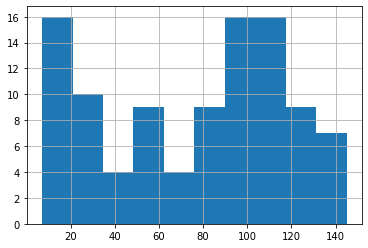

In [69]:
rul_true['True'].hist()

<AxesSubplot:>

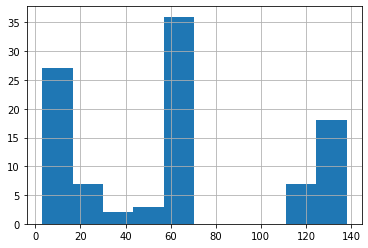

In [70]:
rul_true.Predicted.hist()

<AxesSubplot:>

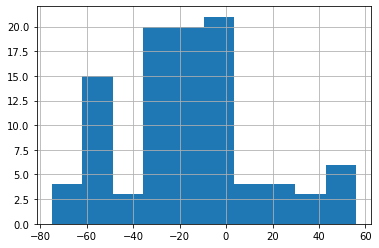

In [71]:
rul_true['Error'] =  rul_true['Predicted'] - rul_true['True']
rul_true['Error'].hist()

In [72]:
len(rul_true)

100

In [73]:
rul_true.columns

Index(['True', '', 'Predicted', 'Error'], dtype='object')

In [74]:
rul_true = rul_true.drop('', axis=1)

In [75]:
rul_true.head()

,True,Predicted,Error
0,112,62.0,-50.0
1,98,138.0,40.0
2,69,62.0,-7.0
3,82,138.0,56.0
4,91,138.0,47.0


In [78]:
rul_true.to_csv('RUL_FD001_Out.csv')

In [76]:
rul_true[rul_true['True'] < 50]

,True,Predicted,Error
17,28,12.0,-16.0
19,16,3.0,-13.0
23,20,3.0,-17.0
30,8,3.0,-5.0
31,48,18.0,-30.0
33,7,3.0,-4.0
34,11,3.0,-8.0
35,19,18.0,-1.0
36,21,3.0,-18.0
39,28,3.0,-25.0


## Comparing Predictions to Actual

Text(0.5, 1.0, 'Comparing Model Projections to Baseline')

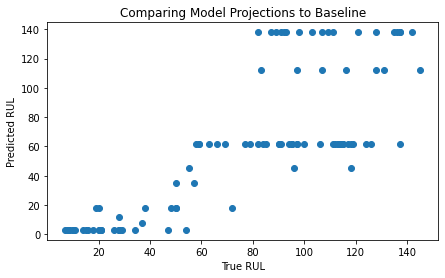

In [93]:
plt.figure(figsize=(7,4))
plt.scatter(rul_true['True'], rul_true['Predicted'])
plt.ylabel('Predicted RUL')
plt.xlabel('True RUL')
plt.title('Comparing Model Projections to Baseline')
#plt.scatter(range(60), range(60), c='red')
#plt.savefig('RUL_HatMarkup.png');

## Versioning / Environment

In [ ]:
import keras
print(keras.__version__)

In [ ]:
!pip freeze > requirements.txt